In [ ]:
from tensorflow.keras.datasets import mnist

#load MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [2]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0].shape


(28, 28)

In [6]:
from matplotlib import pyplot as plt

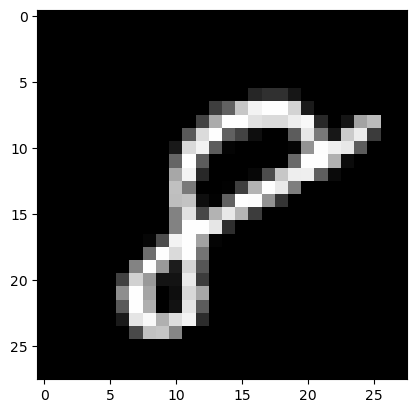

In [7]:
plt.imshow(x_train[-1])
plt.gray()
plt.show()

In [8]:
y_train[-1]

8

# Model Architecture

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [11]:
# set image information
channels=1
height=28
width=28

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
#Keras format for img (no_of_img,height,width,,channel)
train_data=x_train.reshape(x_train.shape[0],height,width,channels) 

In [16]:
train_data.shape

(60000, 28, 28, 1)

In [17]:
test_data=x_test.reshape(x_test.shape[0],height,width,channels)

In [18]:
# scale the data
train_data=train_data/255
test_data=test_data/255

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
# Encoding  of data 
train_target=to_categorical(y_train)
test_target=to_categorical(y_test)

In [21]:
train_target

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
test_target.shape[1]

10

In [23]:
#number of classes
number_of_classes=test_target.shape[1]

In [24]:
#model building

model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(height,width,channels),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(number_of_classes,activation='softmax'))

In [25]:
5*5*64+64

1664

In [26]:
(32*5*5)*64+32

51232

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [28]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
from livelossplot import PlotLossesKerasTF

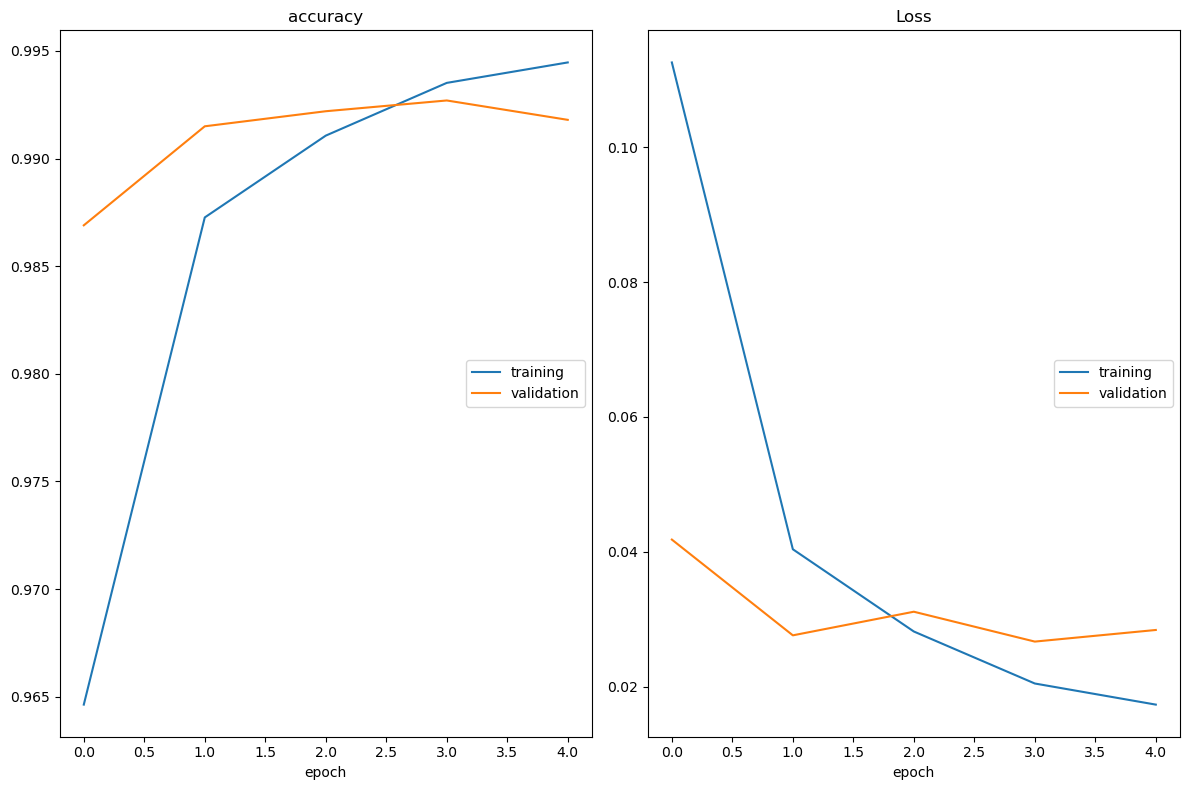

accuracy
	training         	 (min:    0.965, max:    0.994, cur:    0.994)
	validation       	 (min:    0.987, max:    0.993, cur:    0.992)
Loss
	training         	 (min:    0.017, max:    0.113, cur:    0.017)
	validation       	 (min:    0.027, max:    0.042, cur:    0.028)
3750/3750 [==============================] - 57s 15ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0284 - val_accuracy: 0.9918


In [30]:
# train the model
res=model.fit(train_data,train_target,batch_size=16,epochs=5,validation_data=(test_data,test_target),callbacks=[PlotLossesKerasTF()])

In [31]:
model.save("digitModel.h5")

In [32]:
from tensorflow.keras.models import load_model

In [33]:
network=load_model('digitModel.h5')

In [34]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [35]:
import cv2

In [36]:
img=cv2.imread('zero.png',0)

In [37]:
img.shape

(28, 28)

In [38]:
x=img.reshape(1,28,28,1)

In [39]:
x=x/255

In [40]:
network.predict(x)

array([[9.9999833e-01, 1.0987214e-11, 1.1660286e-06, 8.5669838e-10,
        3.6272772e-07, 3.6629426e-09, 3.8214704e-08, 2.8924866e-12,
        1.4626878e-08, 1.3208506e-07]], dtype=float32)

In [41]:
network.predict(x).argmax(axis=1)

array([0], dtype=int64)

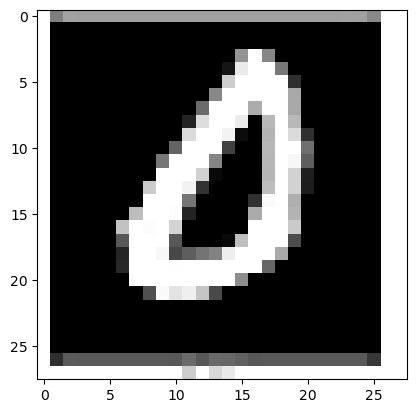

In [42]:
plt.imshow(img)
